ANIMATED BUBBLE CHART VISUALIZATION

 Generating data for 8 companies over 10 years
 Generated 80 data points

SAMPLE DATA (First 10 rows)
   Year   Company  Revenue  Profit  Employees  Market_Share
0  2015  TechCorp     65.5     8.8        546           3.3
1  2016  TechCorp     81.1     9.8        589           4.1
2  2017  TechCorp     99.7     8.4        629           5.0
3  2018  TechCorp    123.8    11.1        704           6.2
4  2019  TechCorp    156.6    15.5        793           7.8
5  2020  TechCorp    203.8    18.2        907          10.2
6  2021  TechCorp    256.7    31.1        962          12.8
7  2022  TechCorp    319.3    44.2       1047          16.0
8  2023  TechCorp    410.2    39.6       1192          20.5
9  2024  TechCorp    495.6    46.1       1276          24.8

DATASET STATISTICS
          Year  Revenue  Profit  Employees  Market_Share
count    80.00    80.00   80.00      80.00         80.00
mean   2019.50   170.46   19.84     588.06          8.53
std       

C:\Users\Asmit\AppData\Local\Temp\ipykernel_13140\382073553.py:214: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = Circle((x, y), radius=np.sqrt(size)/15,


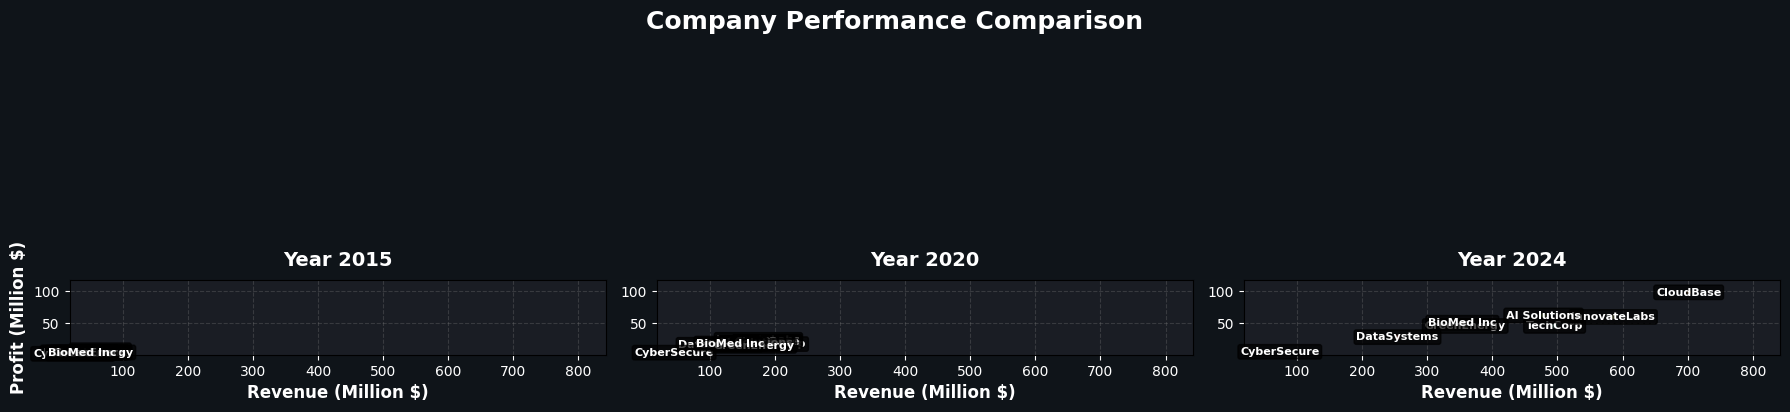

✓ Static charts created!
 Saving animation to company_growth_animation.gif...


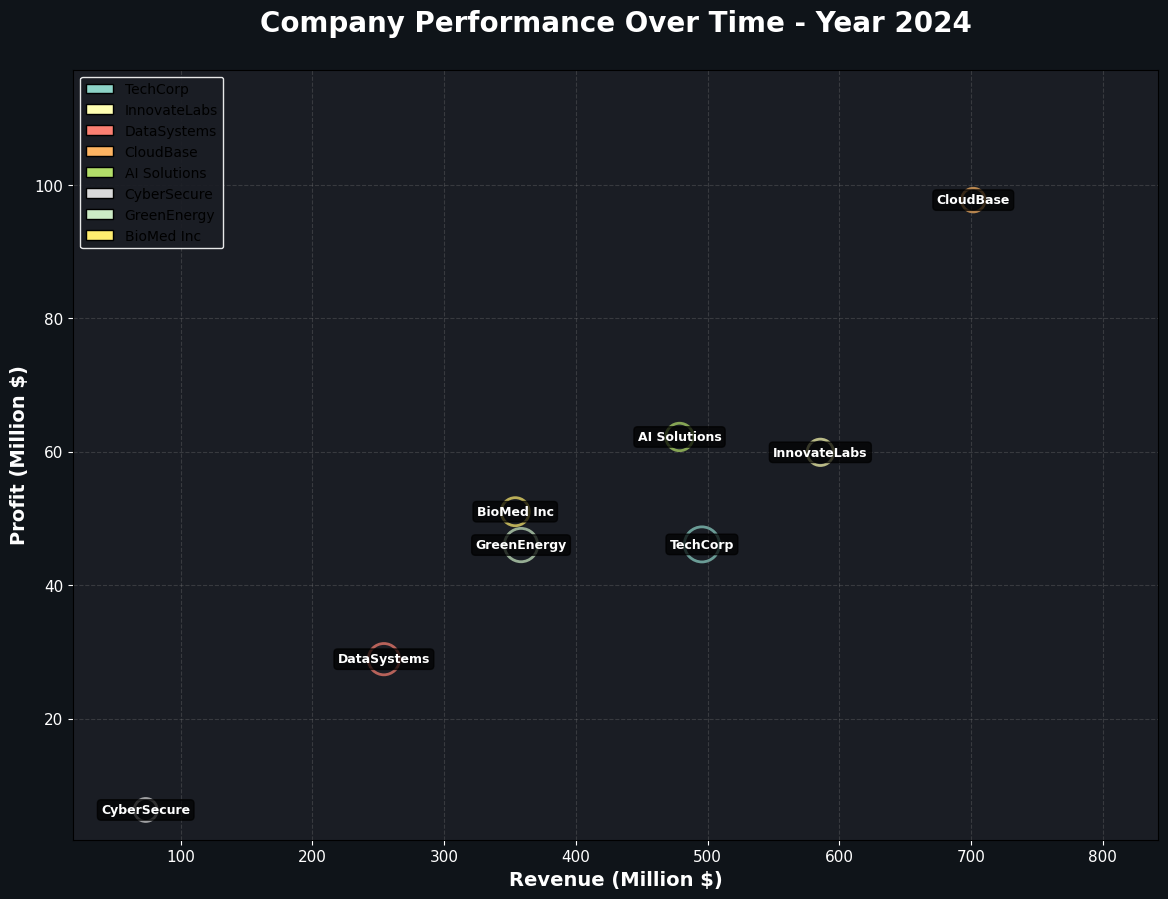


GROWTH ANALYSIS

📊 Performance Summary (2015 → 2024):
----------------------------------------------------------------------

TechCorp:
  Revenue Growth: $65.5M → $495.6M (+656.6%)
  Employee Growth: 546 → 1276 (+133.7%)

InnovateLabs:
  Revenue Growth: $41.4M → $585.5M (+1314.3%)
  Employee Growth: 331 → 720 (+117.5%)

DataSystems:
  Revenue Growth: $47.7M → $254.2M (+432.9%)
  Employee Growth: 431 → 1015 (+135.5%)

CloudBase:
  Revenue Growth: $35.2M → $701.6M (+1893.2%)
  Employee Growth: 264 → 580 (+119.7%)

AI Solutions:
  Revenue Growth: $46.9M → $478.6M (+920.5%)
  Employee Growth: 398 → 783 (+96.7%)

CyberSecure:
  Revenue Growth: $22.9M → $73.4M (+220.5%)
  Employee Growth: 221 → 547 (+147.5%)

GreenEnergy:
  Revenue Growth: $54.0M → $358.3M (+563.5%)
  Employee Growth: 485 → 1153 (+137.7%)

BioMed Inc:
  Revenue Growth: $37.5M → $353.9M (+843.7%)
  Employee Growth: 332 → 816 (+145.8%)

BUBBLE CHART INTERPRETATION GUIDE

 HOW TO READ THE BUBBLE CHART:

 POSITION:
   • X-axis 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.patches import Circle
import matplotlib.patches as mpatches

print("=" * 70)
print("ANIMATED BUBBLE CHART VISUALIZATION")
print("=" * 70)

# Generate sample dataset - Company Growth Over Time
def generate_company_data(n_years=10, n_companies=8):
    """
       
    Parameters:
    n_years: Number of years to simulate
    n_companies: Number of companies to track
    """
    print(f"\n Generating data for {n_companies} companies over {n_years} years")
    
    companies = ['TechCorp', 'InnovateLabs', 'DataSystems', 'CloudBase', 
                 'AI Solutions', 'CyberSecure', 'GreenEnergy', 'BioMed Inc'][:n_companies]
    
    years = list(range(2015, 2015 + n_years))
    
    data = []
    
    # Starting values for each company
    base_revenue = [50, 30, 40, 25, 35, 20, 45, 30]
    base_profit = [5, 3, 4, 2, 3.5, 2, 4.5, 3]
    base_employees = [500, 300, 400, 250, 350, 200, 450, 300]
    growth_rates = [1.25, 1.35, 1.20, 1.40, 1.30, 1.15, 1.22, 1.28]
    
    for i, company in enumerate(companies):
        revenue = base_revenue[i]
        profit = base_profit[i]
        employees = base_employees[i]
        
        for year in years:
            # Adding some randomness to growth
            revenue *= growth_rates[i] * np.random.uniform(0.95, 1.05)
            profit = revenue * np.random.uniform(0.08, 0.15)
            employees = int(employees * np.random.uniform(1.05, 1.15))
            
            # Market share calculation
            market_share = revenue / 20  # Simplified
            
            data.append({
                'Year': year,
                'Company': company,
                'Revenue': round(revenue, 1),
                'Profit': round(profit, 1),
                'Employees': employees,
                'Market_Share': round(market_share, 1)
            })
    
    df = pd.DataFrame(data)
    print(f" Generated {len(df)} data points")
    return df

# Generate the data
df = generate_company_data(n_years=10, n_companies=8)

print("\n" + "=" * 70)
print("SAMPLE DATA (First 10 rows)")
print("=" * 70)
print(df.head(10))

print("\n" + "=" * 70)
print("DATASET STATISTICS")
print("=" * 70)
print(df.describe().round(2))

# Create animated bubble chart
def create_animated_bubble_chart(df, save_path='animated_bubble_chart.gif'):

     
    # Setup figure
    fig, ax = plt.subplots(figsize=(14, 10), facecolor='#0f1419')
    ax.set_facecolor('#1a1d24')
    
    # Getting unique years and companies
    years = sorted(df['Year'].unique())
    companies = df['Company'].unique()
    
    # Color map for companies
    colors = plt.cm.Set3(np.linspace(0, 1, len(companies)))
    company_colors = {company: colors[i] for i, company in enumerate(companies)}
    
    # Setting axis limits based on data range
    x_min, x_max = df['Revenue'].min() * 0.8, df['Revenue'].max() * 1.2
    y_min, y_max = df['Profit'].min() * 0.8, df['Profit'].max() * 1.2
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    
    # Labels
    ax.set_xlabel('Revenue (Million $)', fontsize=14, fontweight='bold', color='white')
    ax.set_ylabel('Profit (Million $)', fontsize=14, fontweight='bold', color='white')
    ax.tick_params(colors='white', labelsize=11)
    ax.grid(True, alpha=0.3, linestyle='--', color='gray')
    
    
    title = ax.text(0.5, 1.05, '', transform=ax.transAxes,
                   ha='center', fontsize=20, fontweight='bold', color='white')
    
    # Createing legend
    legend_elements = [mpatches.Patch(facecolor=company_colors[company], 
                                     edgecolor='black', label=company)
                      for company in companies]
    ax.legend(handles=legend_elements, loc='upper left', fontsize=10,
             framealpha=0.9, facecolor='#1a1d24', edgecolor='white')
    
    # Initializing scatter plot
    scatter = ax.scatter([], [], s=[], c=[], alpha=0.7, edgecolors='black', linewidth=2)
    
    # Text annotations for each company
    texts = {company: ax.text(0, 0, '', fontsize=9, fontweight='bold',
                             ha='center', va='center', color='white',
                             bbox=dict(boxstyle='round,pad=0.3', 
                                     facecolor='black', alpha=0.7))
            for company in companies}
    
    def init():
        scatter.set_offsets(np.empty((0, 2)))
        scatter.set_sizes([])
        scatter.set_array(np.array([]))
        for text in texts.values():
            text.set_text('')
        return [scatter] + list(texts.values()) + [title]
    
    def update(frame):
        year = years[frame]
        
        # Filtering data for current year
        year_data = df[df['Year'] == year]
        
        # Preparing data
        x = year_data['Revenue'].values
        y = year_data['Profit'].values
        sizes = year_data['Employees'].values / 2  # Scale for visualization
        colors_list = [company_colors[company] for company in year_data['Company'].values]
        
        # Updating scatter plot
        scatter.set_offsets(np.c_[x, y])
        scatter.set_sizes(sizes)
        scatter.set_color(colors_list)
        
        # Updating text annotations
        for idx, row in year_data.iterrows():
            company = row['Company']
            if company in texts:
                texts[company].set_position((row['Revenue'], row['Profit']))
                texts[company].set_text(company)
        
        # Updating title
        title.set_text(f'Company Performance Over Time - Year {year}')
        
        return [scatter] + list(texts.values()) + [title]
    
    # Creating animation
    anim = FuncAnimation(fig, update, init_func=init, frames=len(years),
                        interval=800, blit=True, repeat=True)
    
    # Save animation
    print(f" Saving animation to {save_path}...")
    writer = PillowWriter(fps=1.2)
    anim.save(save_path, writer=writer)
  
    
    plt.show()
    
    return anim

# Create static bubble chart for each year
def create_static_bubble_charts(df, years_to_show=3):
    """
    Create static bubble charts for comparison
    
    Parameters:
    df: DataFrame with company data
    years_to_show: Number of years to display
    """
    print(f"\n Creating static bubble charts for comparison...")
    
    years = sorted(df['Year'].unique())
    selected_years = [years[0], years[len(years)//2], years[-1]][:years_to_show]
    
    companies = df['Company'].unique()
    colors = plt.cm.Set3(np.linspace(0, 1, len(companies)))
    company_colors = {company: colors[i] for i, company in enumerate(companies)}
    
    fig, axes = plt.subplots(1, len(selected_years), figsize=(18, 6), facecolor='#0f1419')
    
    if len(selected_years) == 1:
        axes = [axes]
    
    for idx, year in enumerate(selected_years):
        ax = axes[idx]
        ax.set_facecolor('#1a1d24')
        
        # Filtering data
        year_data = df[df['Year'] == year]
        
        # Plotting bubbles
        for _, row in year_data.iterrows():
            company = row['Company']
            x = row['Revenue']
            y = row['Profit']
            size = row['Employees'] / 2
            color = company_colors[company]
            
            circle = Circle((x, y), radius=np.sqrt(size)/15, 
                          color=color, alpha=0.7, edgecolor='black', linewidth=2)
            ax.add_patch(circle)
            
            # Adding company label
            ax.text(x, y, company, ha='center', va='center',
                   fontsize=8, fontweight='bold', color='white',
                   bbox=dict(boxstyle='round,pad=0.2', 
                           facecolor='black', alpha=0.7))
        
        # Setting limits
        x_min, x_max = df['Revenue'].min() * 0.8, df['Revenue'].max() * 1.2
        y_min, y_max = df['Profit'].min() * 0.8, df['Profit'].max() * 1.2
        
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        
        # Labels
        ax.set_xlabel('Revenue (Million $)', fontsize=12, fontweight='bold', color='white')
        if idx == 0:
            ax.set_ylabel('Profit (Million $)', fontsize=12, fontweight='bold', color='white')
        ax.set_title(f'Year {year}', fontsize=14, fontweight='bold', color='white', pad=10)
        ax.tick_params(colors='white', labelsize=10)
        ax.grid(True, alpha=0.3, linestyle='--', color='gray')
        ax.set_aspect('equal', adjustable='box')
    
    plt.suptitle('Company Performance Comparison', fontsize=18, fontweight='bold', 
                color='white', y=0.98)
    plt.tight_layout()
    plt.show()
    
    print("✓ Static charts created!")



# Generating all visualizations
print("\n" + "=" * 70)
print("GENERATING VISUALIZATIONS")
print("=" * 70)

# 1. Creating static bubble charts
create_static_bubble_charts(df, years_to_show=3)

# 2. Creating animated bubble chart
animation = create_animated_bubble_chart(df, save_path='company_growth_animation.gif')

# Analysis
print("\n" + "=" * 70)
print("GROWTH ANALYSIS")
print("=" * 70)

years = sorted(df['Year'].unique())
start_year = years[0]
end_year = years[-1]

print(f"\n📊 Performance Summary ({start_year} → {end_year}):")
print("-" * 70)

for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    
    start_revenue = company_data[company_data['Year'] == start_year]['Revenue'].values[0]
    end_revenue = company_data[company_data['Year'] == end_year]['Revenue'].values[0]
    revenue_growth = ((end_revenue - start_revenue) / start_revenue) * 100
    
    start_employees = company_data[company_data['Year'] == start_year]['Employees'].values[0]
    end_employees = company_data[company_data['Year'] == end_year]['Employees'].values[0]
    employee_growth = ((end_employees - start_employees) / start_employees) * 100
    
    print(f"\n{company}:")
    print(f"  Revenue Growth: ${start_revenue:.1f}M → ${end_revenue:.1f}M ({revenue_growth:+.1f}%)")
    print(f"  Employee Growth: {start_employees} → {end_employees} ({employee_growth:+.1f}%)")

# Interpretation guide
print("\n" + "=" * 70)
print("BUBBLE CHART INTERPRETATION GUIDE")
print("=" * 70)
print("""
 HOW TO READ THE BUBBLE CHART:

 POSITION:
   • X-axis (Horizontal): Revenue - further right = higher revenue
   • Y-axis (Vertical): Profit - higher up = more profit

 SIZE:
   • Bubble size represents number of EMPLOYEES
   • Larger bubble = more employees
   • Shows company scale and workforce

 COLOR:
   • Each company has a unique color
   • Makes it easy to track individual companies
   • See legend for company-color mapping

 ANIMATION:
   • Shows how companies evolve over time
   • Watch bubbles move to track growth/decline
   • Position changes show revenue and profit changes
   • Size changes show workforce expansion/contraction

 KEY INSIGHTS TO LOOK FOR:
   ✓ Upward-right movement = Revenue AND profit growth (ideal)
   ✓ Increasing bubble size = Workforce expansion
   ✓ Horizontal movement = Revenue change without profit change
   ✓ Vertical movement = Profit change without revenue change
   ✓ Companies close together = Similar performance levels

""")


